<a href="https://colab.research.google.com/github/KdrDrn-C8301Sam/01-DAwPy-NumPy/blob/main/01_01_Preparing_The_Data_For_Analysis(Student_C8301_Sam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="200" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

<p style="text-align: center;"><img src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="600" height="150" class="img-fluid" alt="CLRSWY_LOGO"></p>
<p style="text-align: center;"><img src="https://i.ibb.co/XS0bxSH/best-bootcamps.png" width="400" height="130" class="img-fluid" alt="CLRSWY_LOGO"></p>
<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<h1><p style='text-align: center;'>AutoScout<br>Part - 1</p><h1> - Preparing The Data For Analysis <img src='https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki' class='img-fluid' alt='CLRSWY' width='200' height='100'> 

Before beginning your analysis, it is critical that you first examine and clean the dataset, to make working with it a more efficient process. You will practice fixing data types, handling missing values, and dropping columns and rows while learning about the AutoScout dataset.Auto Scout data used in this project scraped from the Website of an online car trading company in 2022, and contains many features of 13 different car makes including 594 models. 

***

## Examining the dataset

You'll be analyzing a dataset of autos  that was collected by the AutoScout Project.

Before beginning your analysis, it's important that you familiarize yourself with the dataset. You'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.

**INSTRUCTIONS**

*   Import related libraries with their alias.
*   Read the file RI_cleaned.csv into a DataFrame named ``ri``
*   Examine the first 5 rows of the ``DataFrame`` (known as the ``"head"``).
*   Examine the last 5 rows of the ``DataFrame`` (known as the ``"tail"``).
*   Examine the ``DataFrame``'s ``"columns"``.
*   Count the number of missing values in each column: Use ``.isnull()`` to check which ``DataFrame`` elements are missing, and then take the ``.sum()`` to count the number of ``True`` values in each column.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

In [2]:
import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import seaborn
print('seaborn version: {}'.format(seaborn.__version__))

matplotlib version: 3.10.1
seaborn version: 0.13.2


In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (6, 3)

**Start.**

In [4]:
path ='C:/_A_DataAnalysis/ipnyb files/project_capstone/as24_cars.json'
#ri = pd.read_csv(path)  #,encoding='latin-1')
ri=pd.read_json(path,lines=False)

In [5]:
#ri_copy = pd.read_csv(path)  #,encoding='latin-1')
ri_copy =ri.copy()

In [6]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [7]:
ri.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT,200CDI BE Line 4M 7G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]","[\n, A 35 AMG ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-","€ 46,990.-","€ 16,800.-"
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 5, \n]"
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [8]:
ri.tail().T

,29475,29476,29477,29478,29479
make_model,Volvo S40,Volvo C30,Volvo S90,Volvo S80,NaN
short_description,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen,1.6 D DRIVe Start/Stop R-design,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUIS...,NaN
make,\nVolvo\n,\nVolvo\n,\nVolvo\n,\nVolvo\n,NaN
model,"[\n, S40 ,\n]","[\n, C30 ,\n]","[\n, S90 ,\n]","[\n, S80 ,\n]",NaN
location,"Stobbeweg 6, 2461 EX TER AAR, NL","Sur rendez-vous, 5060 Sambreville, BE","Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL","Lage Ham 106, 5102 AE DONGEN, NL",NaN
price,"€ 5,499.-","€ 7,300.-","€ 29,900.-","€ 4,440.-",NaN
Body type,"[\n, Sedan, \n]","[\n, Sedan, \n]","[\n, Sedan, \n]","[\n, Sedan, \n]",NaN
Type,"[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]",NaN
Doors,"[\n, 4, \n]","[\n, 3, \n]","[\n, 4, \n]","[\n, 4, \n]",NaN
Country version,NaN,"[\n, Belgium, \n]",NaN,NaN,NaN


In [9]:
ri.sample(15).T

,18330,5701,6496,23,4449,24908,5370,17965,4209,959,3447,9635,27355,19754,15957
make_model,Toyota C-HR,Renault Megane,Renault Talisman,Mercedes-Benz A 200,Opel Astra,Hyundai i30,Renault Megane,NaN,Opel Astra,Mercedes-Benz AMG GT,Opel Astra,Fiat 500,Volvo 480,Nissan 370Z,Dacia Duster
short_description,2.0 Hybrid E-CVT GR-S,2.0 TCE 2009 RS Uitgevoerd 285PK,"1.6dCi ENERGY INITIALE PARIS EDC *NP:€42.250,-*",,K INNOVATION 1.6T NAVI Sport-Paket PDC Int,cw 1.5 T-GDI Mild-Hybrid Kamera Klima DAB,TCe 180 Coupe-Cabriolet Monaco GP,NaN,"K ST 1.2,NAVI,PDC+Kamera,SHZ,LRHZ,Allwetterreifen",63 4M+ Performance Night Massage Burm,GTC 1.8 Edition,BEV,Turbo Tüv/AU 08/23 Hauser Fahrwerk 3. Hand,Coupé 3.7 V6 344 Nismo,dCi 110 4x2 SL Steel
make,\nToyota\n,\nRenault\n,\nRenault\n,\nMercedes-Benz\n,\nOpel\n,\nHyundai\n,\nRenault\n,NaN,\nOpel\n,\nMercedes-Benz\n,\nOpel\n,\nFiat\n,\nVolvo\n,\nNissan\n,\nDacia\n
model,"[\n, C-HR ,\n]","[\n, Megane ,\n]","[\n, Talisman ,\n]","[\n, A 200 ,\n]","[\n, Astra ,\n]","[\n, i30 ,\n]","[\n, Megane ,\n]",NaN,"[\n, Astra ,\n]","[\n, AMG GT ,\n]","[\n, Astra ,\n]","[\n, 500 ,\n]","[\n, 480 ,\n]","[\n, 370Z ,\n]","[\n, Duster ,\n]"
location,"Via Flaminia, 888, 00191 Roma, IT","3602PH MAARSSEN, NL","Gistelsteenweg 140, 8490 Varsenare, BE","Oeverstraat 3, 9160 Lokeren, BE","Hammer Straße 92, 59457 Werl, DE","Steinstraße 10, 16303 Schwedt/Oder, DE","Justus-von-Liebig-Str. 1, 49685 Emstek, DE",NaN,"Hauptstr. 167, 13158 Berlin, DE","Detmolder Str. 107-109, 33100 Paderborn, DE","45355 Essen, DE","Boulevard Zenobe Gramme 33, 4040 Herstal, BE","Gotlandweg 20, 59494 Soest, DE","38 Boulevard François Mitterand, Drive Automob...","Route De Quimper, 29900 CONCARNEAU, FR"
price,"€ 32,800.-","€ 8,995.-","€ 20,950.-","€ 32,950.-","€ 20,490.-","€ 33,190.-","€ 12,990.-",NaN,"€ 23,788.-","€ 127,990.-","€ 2,250.-","€ 31,990.-","€ 3,875.-","€ 45,990.-","€ 11,990.-"
Body type,"[\n, Off-Road/Pick-up, \n]","[\n, Coupe, \n]","[\n, Station wagon, \n]","[\n, Compact, \n]","[\n, Sedan, \n]","[\n, Station wagon, \n]","[\n, Convertible, \n]",NaN,"[\n, Station wagon, \n]","[\n, Coupe, \n]","[\n, Coupe, \n]","[\n, Compact, \n]","[\n, Coupe, \n]","[\n, Coupe, \n]","[\n, Off-Road/Pick-up, \n]"
Type,"[\n, Demonstration, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Employee's car, \n]","[\n, Used, \n]",NaN,"[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Demonstration, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 2, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]","[\n, 2, \n]",NaN,"[\n, 5, \n]","[\n, 5, \n]","[\n, 3, \n]","[\n, 3, \n]","[\n, 2, \n]","[\n, 2, \n]","[\n, 5, \n]"
Country version,NaN,NaN,"[\n, Belgium, \n]",NaN,"[\n, Germany, \n]","[\n, Czechia, \n]","[\n, Germany, \n]",NaN,"[\n, Germany, \n]",NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ri.isnull().sum().T

make_model                     850
short_description              850
make                           850
model                          850
location                       850
price                          850
Body type                      850
Type                           850
Doors                         1209
Country version              12591
Offer number                  6380
Warranty                     13696
Mileage                        851
First registration             852
Gearbox                       1098
Fuel type                     2637
Colour                        2574
Paint                        14985
desc                          1433
seller                         850
Seats                         3975
Power                         1422
Engine size                   2253
Gears                        10526
CO₂-emissions                10886
Manufacturer colour           7693
Drivetrain                   12587
Cylinders                    10628
Fuel consumption    

## Dropping the rows, that include only null

In [11]:
ri.dropna(how='all').isnull().sum()

make_model                       0
short_description                0
make                             0
model                            0
location                         0
price                            0
Body type                        0
Type                             0
Doors                          359
Country version              11741
Offer number                  5530
Warranty                     12846
Mileage                          1
First registration               2
Gearbox                        248
Fuel type                     1787
Colour                        1724
Paint                        14135
desc                           583
seller                           0
Seats                         3125
Power                          572
Engine size                   1403
Gears                         9676
CO₂-emissions                10036
Manufacturer colour           6843
Drivetrain                   11737
Cylinders                     9778
Fuel consumption    

In [12]:
ri.dropna(how='all',inplace= True)

In [13]:
ri.shape

(28630, 58)

In [14]:
ri.isnull().sum()

make_model                       0
short_description                0
make                             0
model                            0
location                         0
price                            0
Body type                        0
Type                             0
Doors                          359
Country version              11741
Offer number                  5530
Warranty                     12846
Mileage                          1
First registration               2
Gearbox                        248
Fuel type                     1787
Colour                        1724
Paint                        14135
desc                           583
seller                           0
Seats                         3125
Power                          572
Engine size                   1403
Gears                         9676
CO₂-emissions                10036
Manufacturer colour           6843
Drivetrain                   11737
Cylinders                     9778
Fuel consumption    

## Instructions:

In [15]:
#ri.describe(include=['O']).T

## * Column names: clean, add '_', rename 'CO₂' as 'CO2', all - lower case
*(make_model) and [make, model) : include the same info, but can be not compatible, it must be checked
*short_description: can be checked for necessary info, wenn don't include valuable info , then can be deleted
*location: take out city and country,postcode, others can be deleted
*price: take out numeric price and currency
*body type: clean


In [16]:
ri.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'Body type', 'Type', 'Doors', 'Country version', 'Offer number',
       'Warranty', 'Mileage', 'First registration', 'Gearbox', 'Fuel type',
       'Colour', 'Paint', 'desc', 'seller', 'Seats', 'Power', 'Engine size',
       'Gears', 'CO₂-emissions', 'Manufacturer colour', 'Drivetrain',
       'Cylinders', 'Fuel consumption', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', '\nExtras\n',
       'Empty weight', 'Model code', 'General inspection', 'Last service',
       'Full service history', 'Non-smoker vehicle', 'Emission class',
       'Emissions sticker', 'Upholstery colour', 'Upholstery',
       'Production date', 'Previous owner', 'Other fuel types',
       'Power consumption', 'Energy efficiency class', 'CO₂-efficiency',
       'Fuel consumption (WLTP)', 'CO₂-emissions (WLTP)', 'Available from',
       'Taxi or rental car', 'Availability', 'Last timing b

In [17]:
#ri.describe(include=['O']).T

# * Column names: 
rename 'CO₂' as 'CO2', all except CO2- lower case,clean [],add '_'

In [18]:
ri.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('co₂-', 'CO2_').str.replace('&_', '').str.replace(r'[()]', '',regex=True)

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'CO2_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non-smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'CO2_efficiency',
       'fuel_consumption_wltp', 'CO2_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'elect

In [19]:
ri.columns=ri.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('co₂-', 'co2_').str.replace('&_', '').str.replace(r'[()]', '',regex=True)

In [20]:
ri.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co2_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non-smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co2_efficiency',
       'fuel_consumption_wltp', 'co2_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'elect

In [21]:
allcolumns=ri.columns
allcolumns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co2_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non-smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co2_efficiency',
       'fuel_consumption_wltp', 'co2_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'elect

In [22]:
#ri.make.nunique()

In [23]:
#ri.make.value_counts()

In [24]:
#ri.model.value_counts()

In [25]:
#model=ri['model'].apply(lambda x: pd.Series(x[0]))

In [26]:
#model

In [27]:
#model=model[0].str.replace('\n', '').str.replace(r'[,*#]', '',regex=True).str.strip()

In [28]:
#model.nunique()

In [29]:
#for index, value in model.value_counts().items():
 #   if value<5: print( index,value)


In [30]:
#ri['model'].sample(30)

In [31]:
#ri.model=model

In [32]:
#ri.model.sample(5)

In [33]:
#Check all columns for any ;
(ri.astype(str).apply(lambda col: col.str.contains('\*', na=False))).any()

make_model                 False
short_description           True
make                       False
model                      False
location                   False
price                      False
body_type                  False
type                       False
doors                      False
country_version            False
offer_number                True
warranty                   False
mileage                    False
first_registration         False
gearbox                    False
fuel_type                  False
colour                     False
paint                      False
desc                        True
seller                     False
seats                      False
power                      False
engine_size                False
gears                      False
co2_emissions              False
manufacturer_colour         True
drivetrain                 False
cylinders                  False
fuel_consumption           False
comfort_convenience        False
entertainm

In [34]:
def clean_item(x):
    x = str(x)
    x = re.sub(r'[\n\t\r]', '', x)  # Remove control characters

    # Allowed meaningful characters
    allowed = 'a-zA-Z0-9€₺$%-+./'

    # Remove unwanted chars at the start
    x = re.sub(fr'^[^{allowed}]+', '', x)

    # Remove unwanted chars at the end
    x = re.sub(fr'[^{allowed}]+$', '', x)

    return x.strip()

In [35]:
def clean_cell(value):
    # return missing/null values as np.nan
    if not isinstance(value, list) and pd.isna(value):
        return np.nan

    # Helper to clean each item: remove \n, \t, \r and strip
    #def clean_item(x):
    #    return re.sub(r'[\n\t\r]', ',', str(x)).str.replace(r'[()]', ' ',regex=True)strip()
        
    if isinstance(value, list):
        # Flatten nested list and clean each element
        flat = []
        for item in value:
            if isinstance(item, list):
                flat.extend(item)
            else:
                flat.append(item)
        # Clean each flattened item
        #return ';'.join(str(x).strip() for x in flat if x is not None)
        #return tuple(clean_item(x) for x in flat if x is not None)
        cleaned = [clean_item(x) for x in flat if x is not None and str(x).strip() != '']

        if len(cleaned) == 0:
            return np.nan  # Optional: treat empty result as NaN
        elif len(cleaned) == 1:
            return cleaned[0]  # Just a single string
        else:
            return tuple(cleaned)  # A tuple if multiple items
            
    # If it's just a string, clean it    
    elif isinstance(value, str):
        # Remove unwanted whitespace characters and trailing spaces
         return clean_item(value)
        
    # Leave numbers or other types unchanged 
    else:
        return value
   

In [36]:
ri1=ri.copy()

In [37]:
ri1 = ri1.applymap(clean_cell)
ri1

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non-smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co2_efficiency,fuel_consumption_wltp,co2_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.",Compact,Used,5,Spain,7468157,24 months,"120,200 km",06/2016,Manual,Diesel,Black,Metallic,"(Precio al contado: 16950 euros, Vehículo con ...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.",Compact,Pre-registered,4,Spain,7054863,24 months,"5,000 km",06/2022,Automatic,Electric,NaN,NaN,"(Precio al contado: 88900 euros, AUTO OJA S.A....",Dealer,5,215 kW (292 hp),1 cc,9,0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,Mercedes-Benz,A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.",Compact,Used,5,Spain,7410454,12 months,"18,900 km",07/2020,Automatic,Gasoline,Grey,NaN,"(Gris MANUFAKTUR mountaingrau magno, Linea/Est...",Dealer,5,310 kW (421 hp),"1,991 cc",8,NaN,Mountaingrau magno,4WD,4,"(8.4 l/100 km (comb.), 10.9 l/100 km (city), 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,Mercedes-Benz,A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.",Compact,Used,5,Spain,7464503,12 months,"18,995 km",01/2020,Automatic,Gasoline,Yellow,NaN,"(Precio al contado: 48990 euros, BONIFICACION ...",Dealer,5,225 kW (306 hp),"1,991 cc",7,NaN,Amarillo Sol,4WD,4,"(7.3 l/100 km (comb.), 9.3 l/100 km (city), 6....","Air conditioning, Automatic climate control, P...",USB,"ABS, Central door lock, Driver-side airbag, El...",Sport seats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,Mercedes-Benz,A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.",Compact,Used,5,Spain,7127931,12 months,"197,000 km",09/2015,Automatic,Diesel,White,Metallic,"(Precio al contado: 17400 euros, Vehículo en p...",Dealer,5,100 kW (136 hp),"2,143 cc",7,NaN,NaN,4WD,4,"(4.9 l/100 km (comb.), 5.7 l/100 km (city), 4....","Air conditioning, Electrical side mirrors, Mul...","Bluetooth, CD player, MP3, USB","ABS, Central door lock, Driver-side airbag, El...",NaN,"1,545 kg",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29474,Volvo S90,T8 Twin Business Plus AWD Aut.,Volvo,S90,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES","€ 37,600.",Sedan,Used,4,Spain,7449968,12 months,"40,345 km",08/2019,Automatic,NaN,Black,NaN,"(Precio al contado: 41400 euros, Os presento e...",Dealer,4,288 kW (392 hp),"1,969 cc",8,NaN,NaN,4WD,4,2 l/100 km (comb.),"Air conditioning, Automatic climate control, M...","Bluetooth, USB","ABS, Central 

In [38]:
ri

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non-smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co2_efficiency,fuel_consumption_wltp,co2_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7468157, \n]","[\n, 24 months, \n]","120,200 km",06/2016,[\nManual\n],Diesel,Black,Metallic,"[ , Precio al contado: 16950 euros, , , Vehí...",Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]","[\n, 7054863, \n]","[\n, 24 months, \n]","5,000 km",06/2022,[\nAutomatic\n],Electric,NaN,NaN,"[ , Precio al contado: 88900 euros, , AUTO OJ...",Dealer,"[\n, 5, \n]",[\n215 kW (292 hp)\n],[\n1 cc\n],[\n9\n],0 g/km (comb.),Negro Obsidiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7410454, \n]","[\n, 12 months, \n]","18,900 km",07/2020,[\nAutomatic\n],Gasoline,Grey,NaN,"[Gris MANUFAKTUR mountaingrau magno, , Linea/...",Dealer,"[\n, 5, \n]",[\n310 kW (421 hp)\n],"[\n1,991 cc\n]",[\n8\n],NaN,Mountaingrau magno,"[\n, 4WD, \n]",[\n4\n],"[[8.4 l/100 km (comb.)], [10.9 l/100 km (city)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7464503, \n]","[\n, 12 months, \n]","18,995 km",01/2020,[\nAutomatic\n],Gasoline,Yellow,NaN,"[ , Precio al contado: 48990 euros, , , BONI...",Dealer,"[\n, 5, \n]",[\n225 kW (306 hp)\n],"[\n1,991 cc\n]",[\n7\n],NaN,Amarillo Sol,"[\n, 4WD, \n]",[\n4\n],"[[7.3 l/100 km (comb.)], [9.3 l/100 km (city)]...","[Air conditioning, Automatic climate control, ...",[USB],"[ABS, Central door lock, Driver-side airbag, E...",[Sport seats],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]","[\n, 7127931, \n]","[\n, 12 months, \n]","197,000 km",09/2015,[\nAutomatic\n],Diesel,White,Metallic,"[ , Precio al contado: 17400 euros, , Vehícul...",Dealer,"[\n, 5, \n]",[\n100 kW (136 hp)\n],"[\n2,143 cc\n]",[\n7\n],NaN,NaN,"[\n, 4WD, \n]",[\n4\n],"[[4.9 l/100 km (comb.)], [5.7 l/100 km (city)]...","[Air conditioning, Electrical side mirrors, Mu...","[Bluetooth, CD player, MP3, USB]","[ABS, Central door lock, Driver-side airbag, E...",NaN,"[\n1,545 kg\n]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [39]:
#p=ri[['previous_owner','available_from']]
#p = p.applymap(clean_cell)
#p

In [40]:
#p.nunique

In [41]:
#Check if any semicolon exists in the entire DataFrame
#(ri.astype(str).apply(lambda col: col.str.contains(';', na=False))).any().any()

In [42]:
#ri

In [43]:
#ri1_describe=ri1.describe(include=['O']).T
#ri1_describe

In [44]:
nuniq={}
for col in allcolumns:    nuniq.update({col:ri1[col].nunique()})
print(nuniq)

{'make_model': 611, 'short_description': 20941, 'make': 13, 'model': 594, 'location': 8181, 'price': 5021, 'body_type': 6, 'type': 4, 'doors': 6, 'country_version': 25, 'offer_number': 20934, 'warranty': 65, 'mileage': 14183, 'first_registration': 655, 'gearbox': 3, 'fuel_type': 46, 'colour': 14, 'paint': 2, 'desc': 23213, 'seller': 2, 'seats': 11, 'power': 351, 'engine_size': 467, 'gears': 11, 'co2_emissions': 347, 'manufacturer_colour': 4950, 'drivetrain': 3, 'cylinders': 12, 'fuel_consumption': 3452, 'comfort_convenience': 14438, 'entertainment_media': 1944, 'safety_security': 12549, 'extras': 9360, 'empty_weight': 1218, 'model_code': 2186, 'general_inspection': 91, 'last_service': 61, 'full_service_history': 1, 'non-smoker_vehicle': 1, 'emission_class': 9, 'emissions_sticker': 4, 'upholstery_colour': 11, 'upholstery': 6, 'production_date': 49, 'previous_owner': 11733, 'other_fuel_types': 3, 'power_consumption': 104, 'energy_efficiency_class': 10, 'co2_efficiency': 1, 'fuel_consumpt

In [45]:
desired_columns_25=[]
desired_columns_26_99=[]
desired_columns_100=[]
for col in nuniq:  
    if nuniq[col] < 26:    desired_columns_25.append(col)  
    elif nuniq[col] > 25 and nuniq[col] <100:    desired_columns_26_99.append(col)
    else: desired_columns_100.append(col)
print ('columns with number of unique values until 25:\n************\n',desired_columns_25,
       '\n______________\ncolumns with number of unique values between 26-99:\n************\n',desired_columns_26_99,
       '\n______________\ncolumns with number of unique values more than 100 :\n************\n',desired_columns_100)       

columns with number of unique values until 25:
************
 ['make', 'body_type', 'type', 'doors', 'country_version', 'gearbox', 'colour', 'paint', 'seller', 'seats', 'gears', 'drivetrain', 'cylinders', 'full_service_history', 'non-smoker_vehicle', 'emission_class', 'emissions_sticker', 'upholstery_colour', 'upholstery', 'other_fuel_types', 'energy_efficiency_class', 'co2_efficiency', 'taxi_or_rental_car', 'availability', 'electric_range_wltp', 'power_consumption_wltp', 'battery_ownership'] 
______________
columns with number of unique values between 26-99:
************
 ['warranty', 'fuel_type', 'general_inspection', 'last_service', 'production_date', 'fuel_consumption_wltp', 'co2_emissions_wltp', 'last_timing_belt_change'] 
______________
columns with number of unique values more than 100 :
************
 ['make_model', 'short_description', 'model', 'location', 'price', 'offer_number', 'mileage', 'first_registration', 'desc', 'power', 'engine_size', 'co2_emissions', 'manufacturer_col

In [46]:
def draw_countplot (df,columns):
      
    for i in range(round(len(columns)/2)) :
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        # Define a palette function
   
        col1=columns[(i-1)*2]
        col2=columns[(i-1)*2+1]
        print(col1,' , ',col2)
        sns.countplot(df,x=col1,ax=ax[0],palette='GnBu')
        ax[0].set_xticklabels(labels=df[col1].unique(),rotation=45)
        sns.countplot(df,x=col2,ax=ax[1],palette='GnBu')
        ax[1].set_xticklabels(labels=df[col2].unique(),rotation=45) 


#categories = data['category'].unique()
# Create a palette dict: 'Missing' = red, others = default (let sns decide)
#default_colors = sns.color_palette(n_colors=len(categories))
#palette = dict(zip(categories, default_colors))
#palette['NaN_value'] = 'red'  # Override Missing


In [47]:
ri1_missing=ri1.fillna('NaN_value')
ri1_missing.head(1)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non-smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co2_efficiency,fuel_consumption_wltp,co2_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership
0,Mercedes-Benz A 160,CDi,Mercedes-Benz,A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.",Compact,Used,5,Spain,7468157,24 months,"120,200 km",06/2016,Manual,Diesel,Black,Metallic,"(Precio al contado: 16950 euros, Vehículo con ...",Dealer,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value,NaN_value


power_consumption_wltp  ,  battery_ownership
make  ,  body_type
type  ,  doors
country_version  ,  gearbox
colour  ,  paint
seller  ,  seats
gears  ,  drivetrain
cylinders  ,  full_service_history
non-smoker_vehicle  ,  emission_class
emissions_sticker  ,  upholstery_colour
upholstery  ,  other_fuel_types
energy_efficiency_class  ,  co2_efficiency
taxi_or_rental_car  ,  availability
electric_range_wltp  ,  power_consumption_wltp


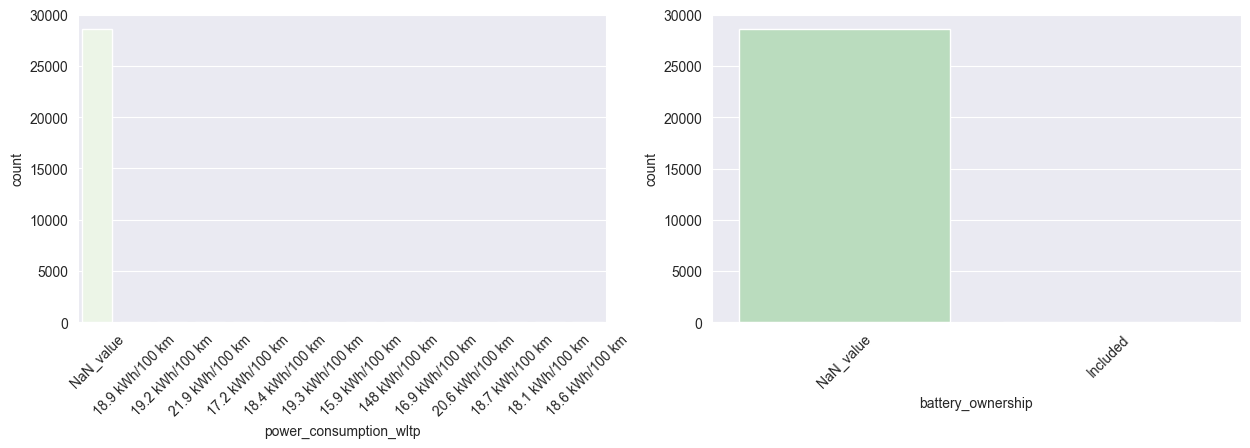

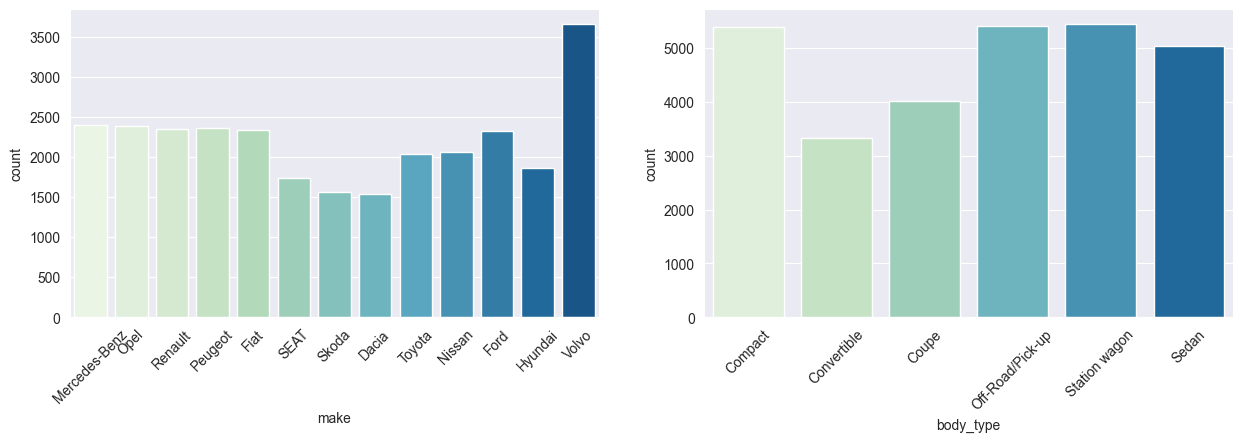

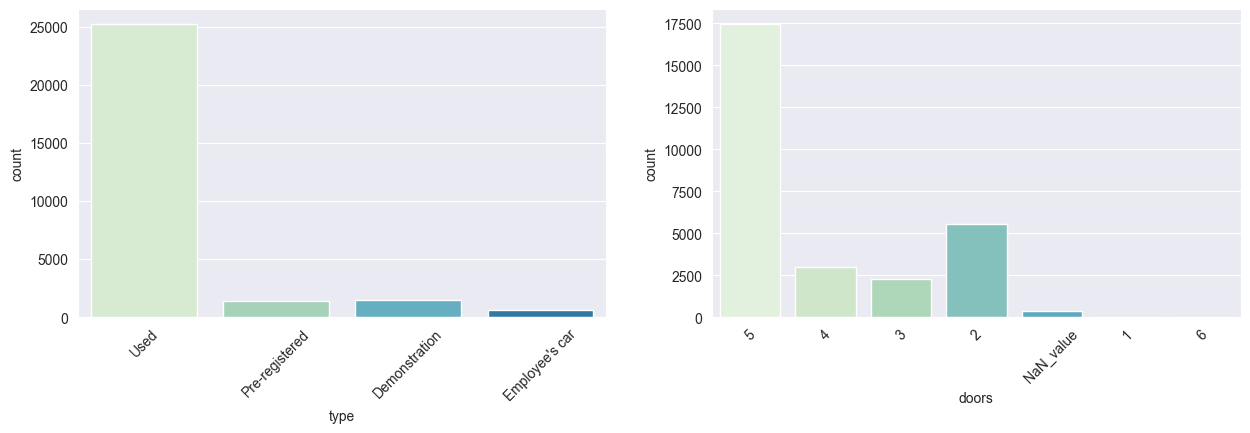

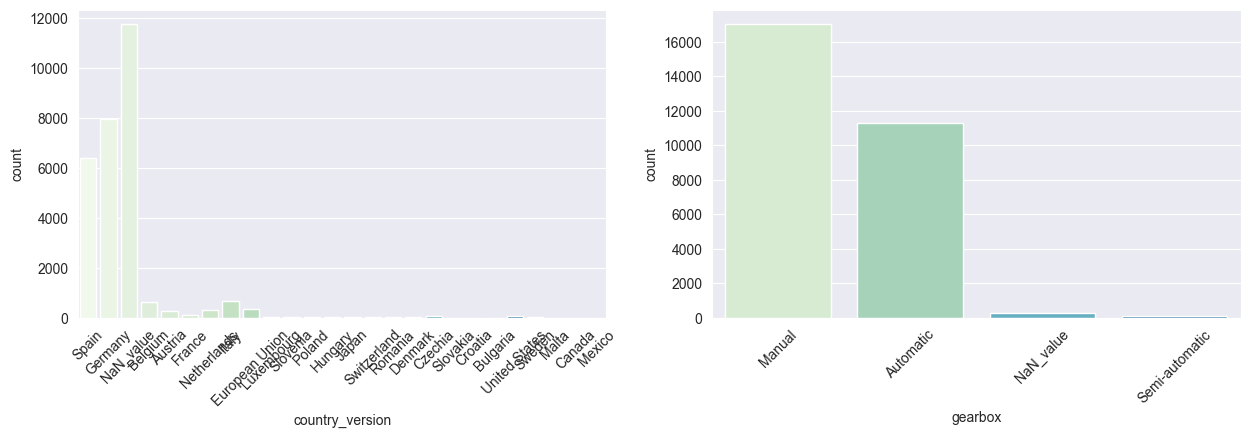

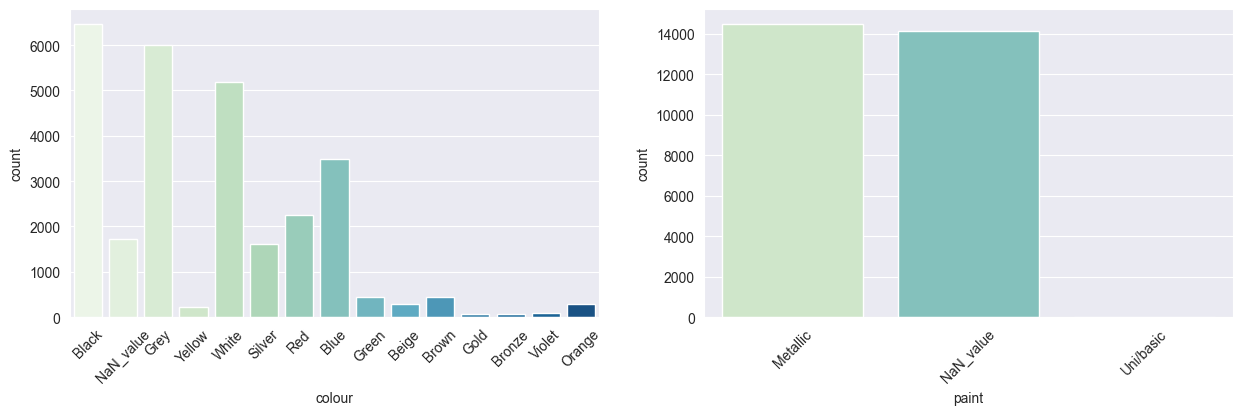

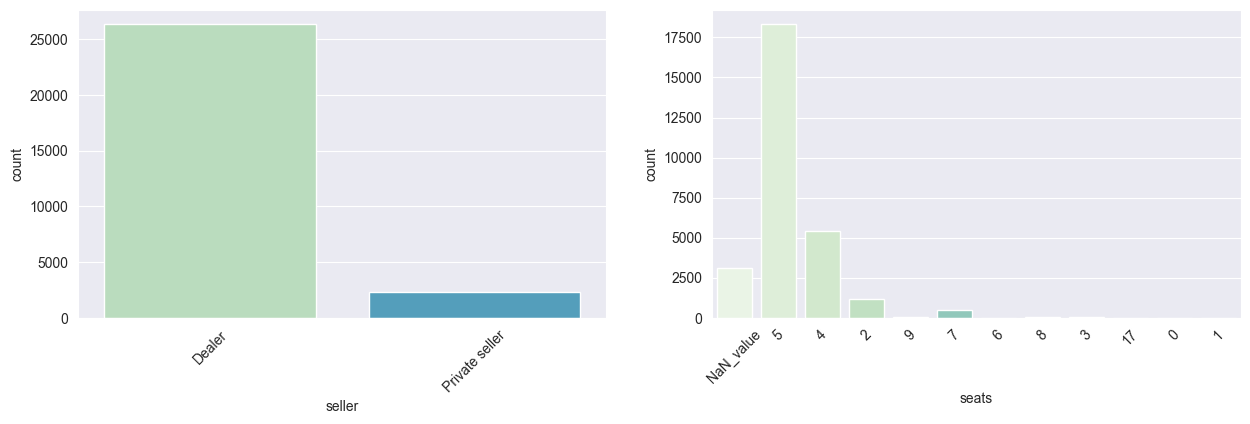

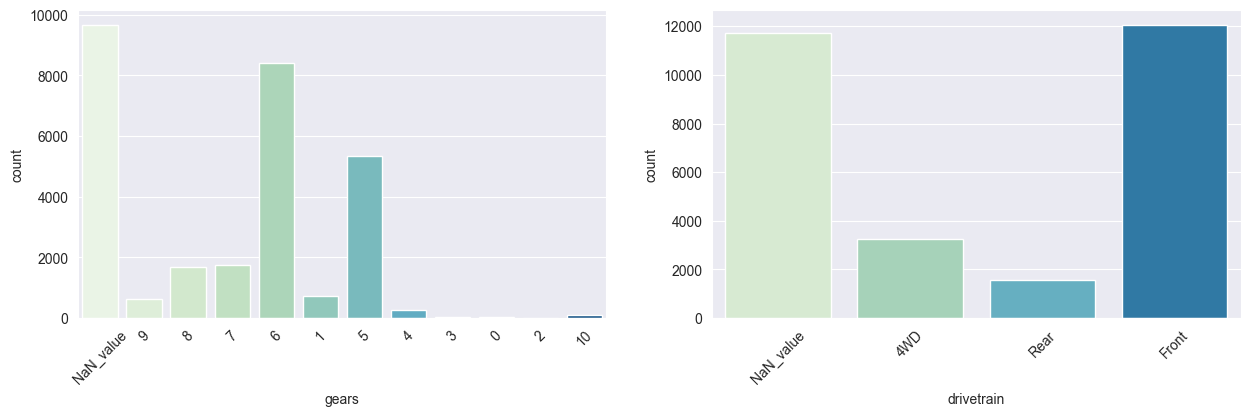

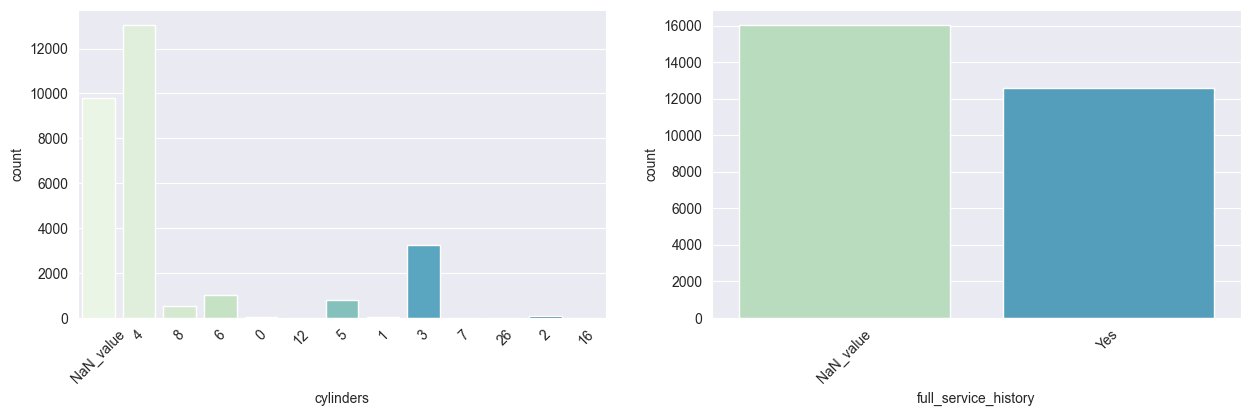

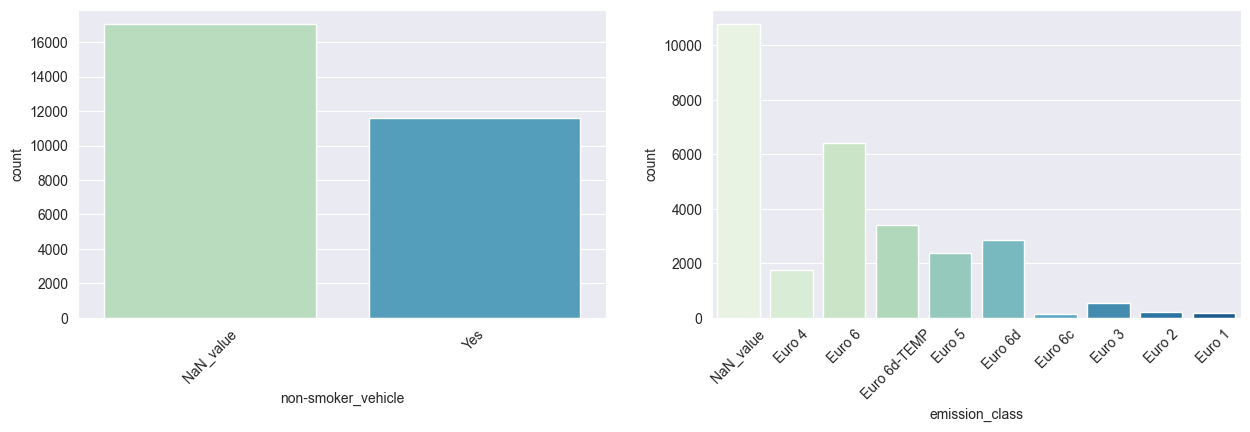

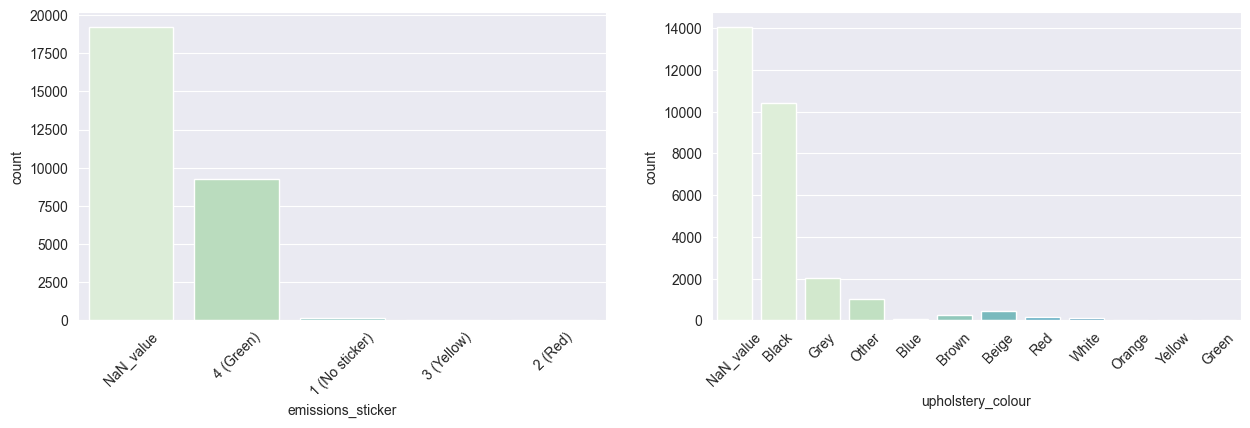

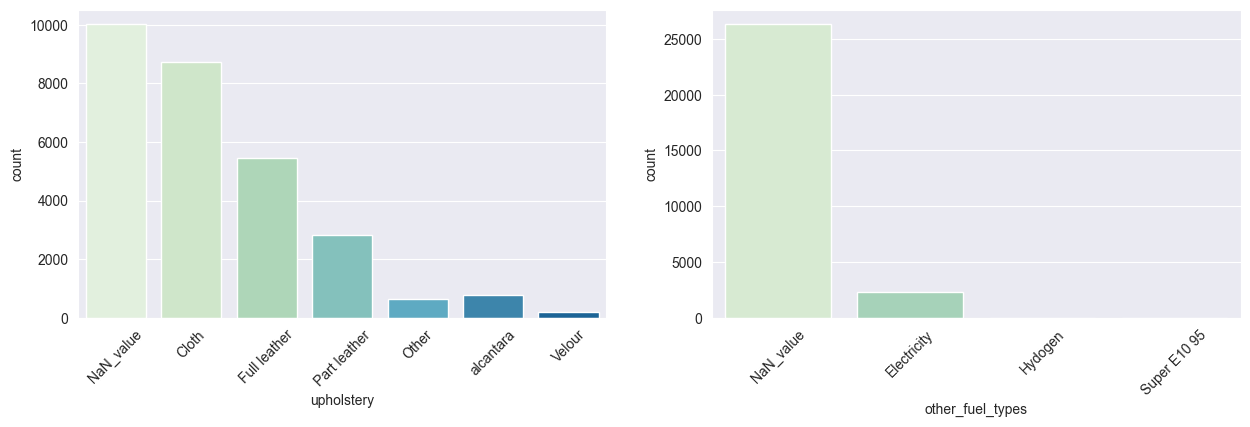

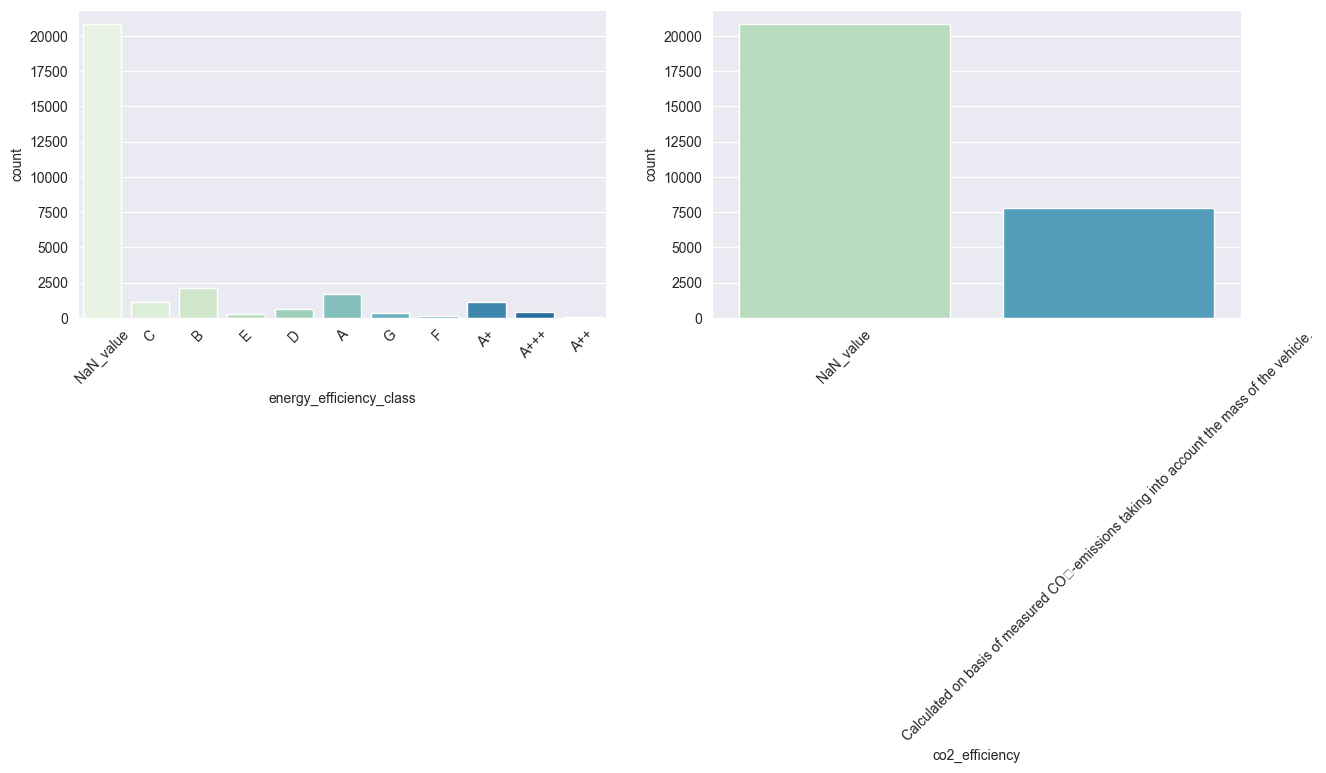

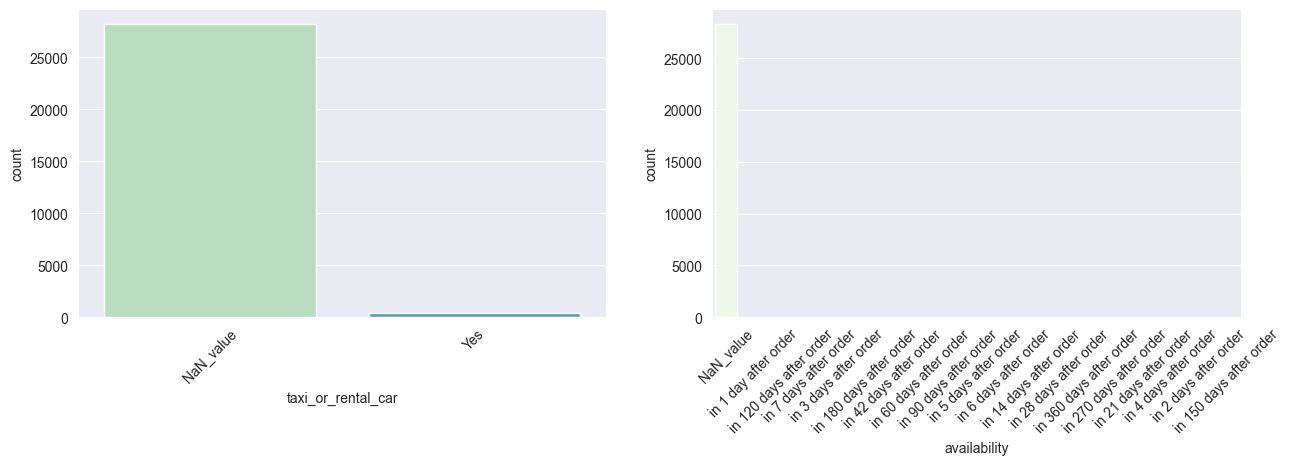

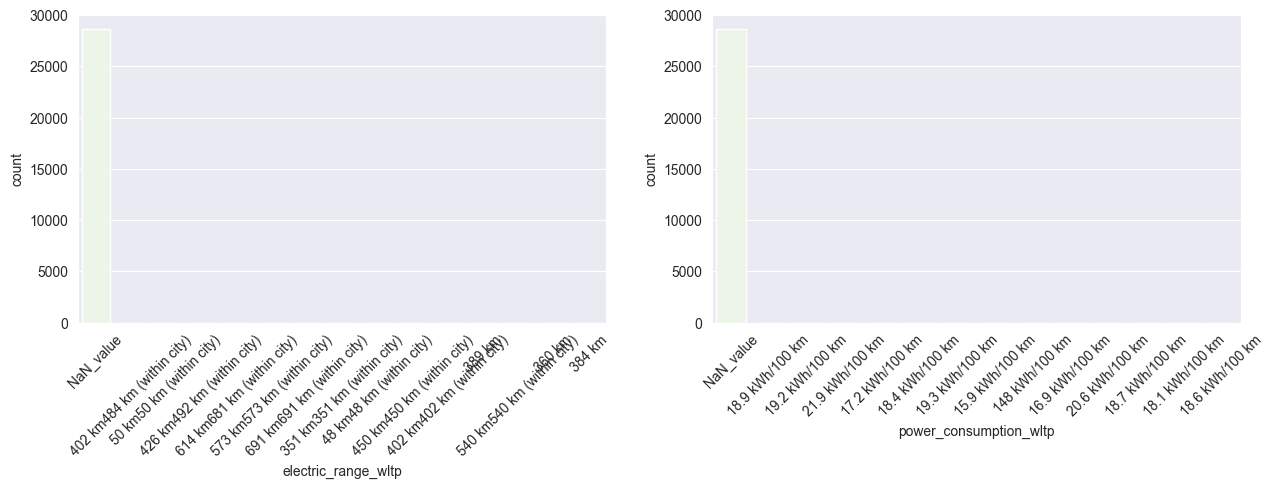

In [49]:
draw_countplot (ri1_missing,desired_columns_25)

In [50]:
def draw_countplot_large (df,columns):
    for col in columns :
        fig,ax=plt.subplots(figsize=(15,4))
        sns.countplot(df,x=col,ax=ax,palette='GnBu')
        ax.set_xticklabels(labels=df[col].unique(),rotation=45)
        plt.show() 
        #df[col].value_counts().plot(kind='bar', color='skyblue')
        #plt.xticks(rotation=45)
              

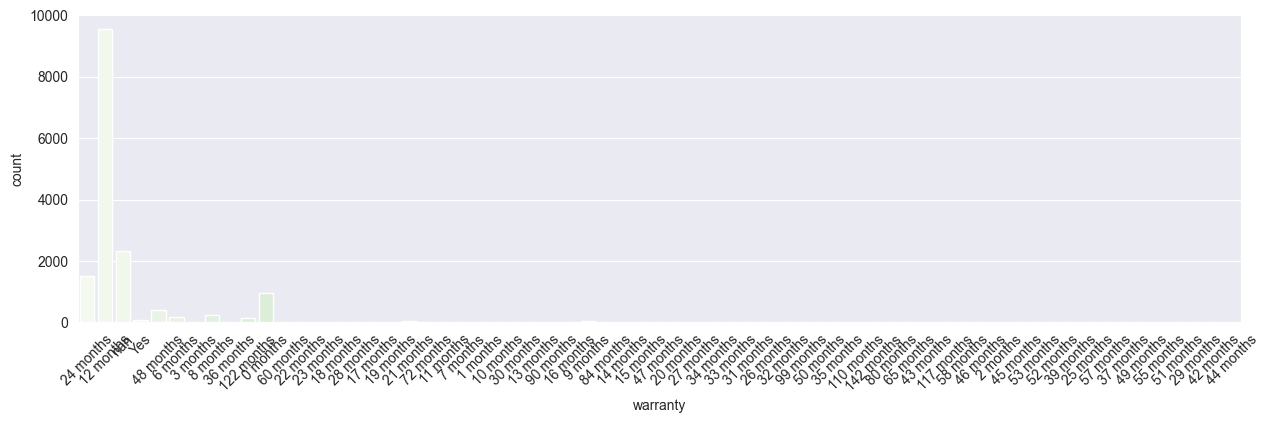

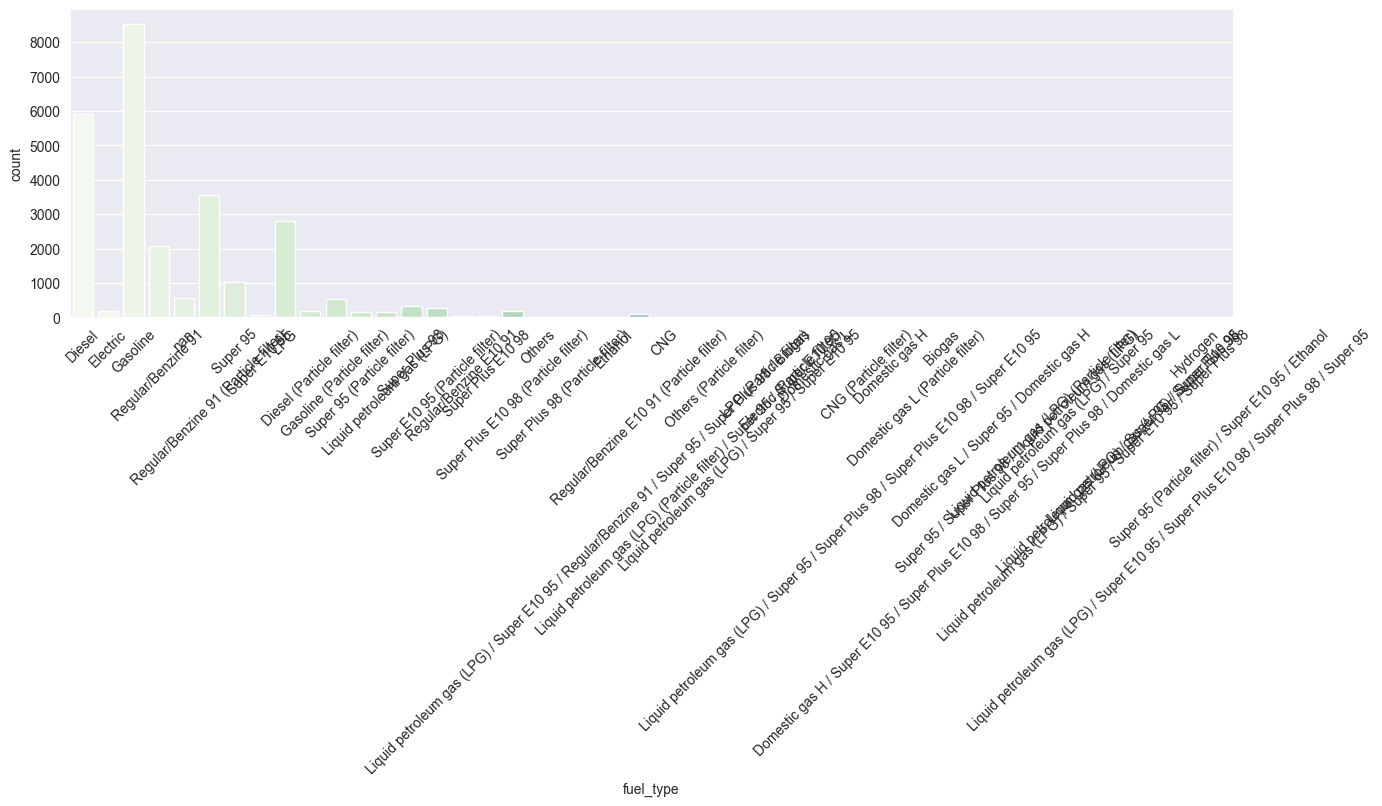

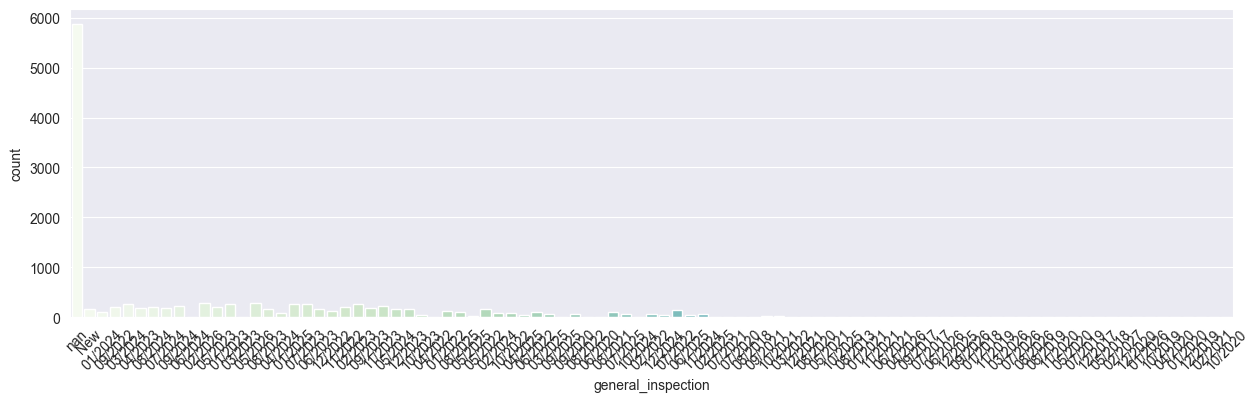

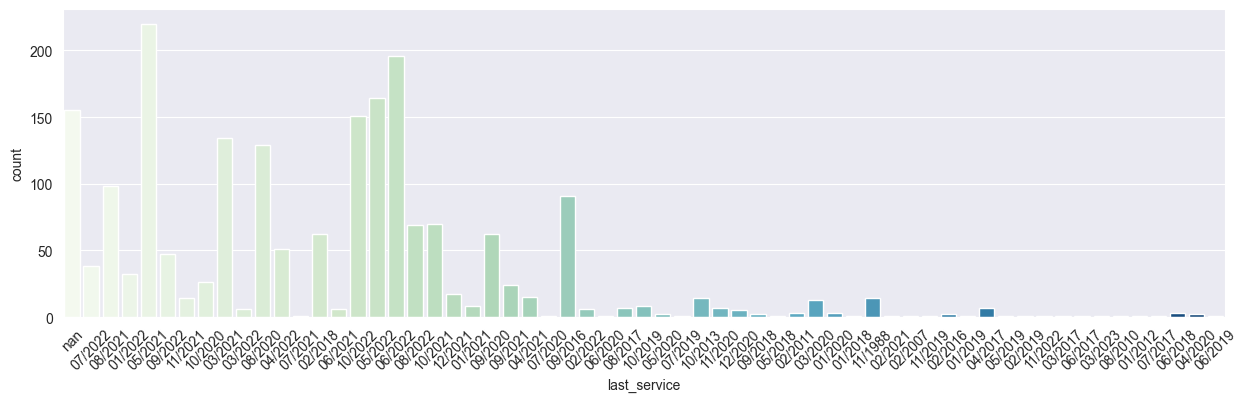

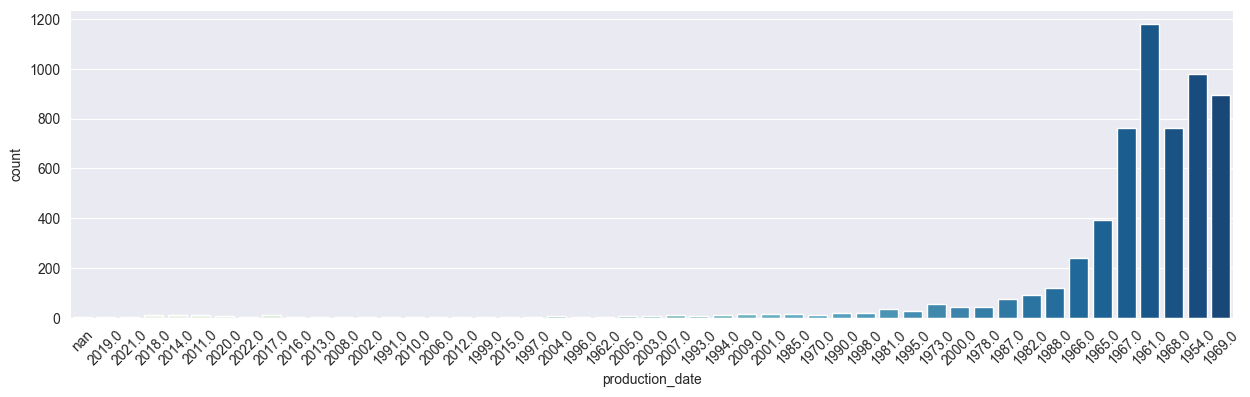

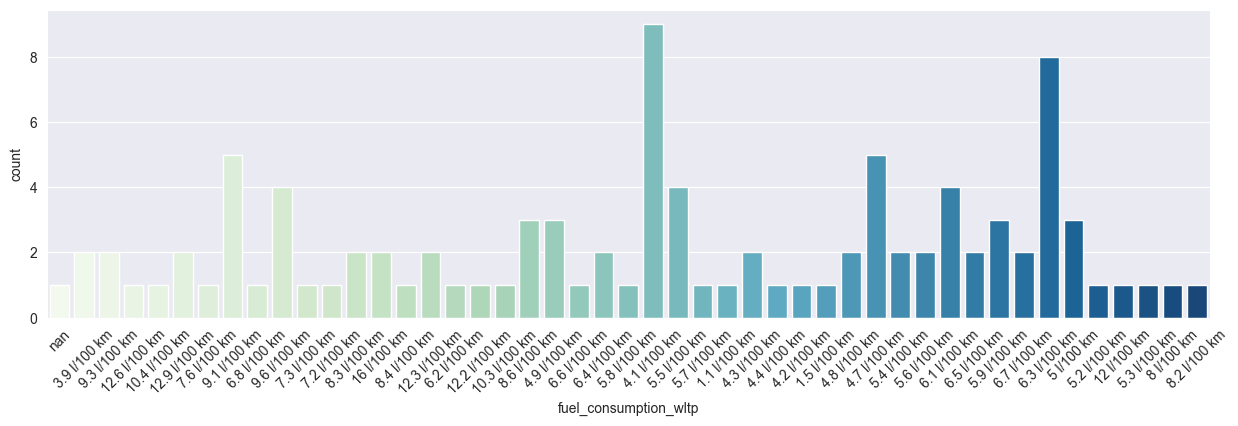

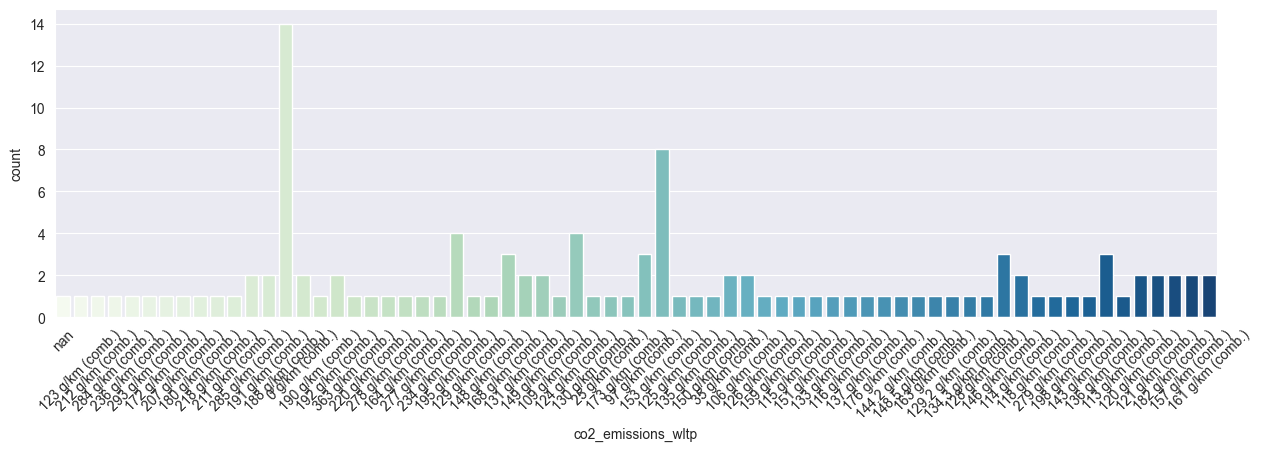

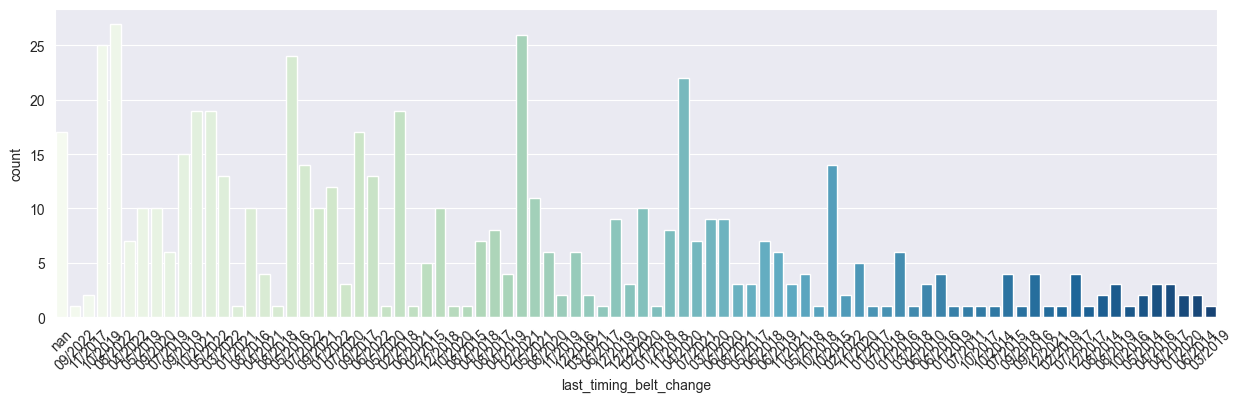

In [51]:
draw_countplot_large (ri1,desired_columns_26_99)

In [ ]:
#ri1.columns

In [ ]:
#ri['Production date'].value_counts()

####  1 value: Desicion for filling these vlaues:
full_service_history: Yes    12565
non-smoker_vehicle: Yes    11594
co2_efficiency: Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.    7804
taxi_or_rental_car: Yes    422
battery_ownership: Included    7

####  CLEANING:
emission_class: Euro 6,6c,6d,6d-TEMP.5,4,3,2,1

emissions_sticker:
4 (Green)         9230
1 (No sticker)     176
3 (Yellow)           6
2 (Red)              2

availability
in 1 day after order       64
...

electric_range_wltp
426 km492 km (within city)    2
389 km                        2

power_consumption_wltp
21.9 kWh/100 km    2
...

warranty
NaN           12846
12 months      9545
Yes            2319
24 months      1515

## DATE columns: Need of decision for formulation:
* general_inspection,last_service,last_timing_belt_change,first registration : MM/yyyy:
  - can be formulated as:
  -     2022-year(value)= years    or
  -     12/2022-value= months
* production_date =yyyy : can be formulated as:
   -     2022-value = years
## Check out , wether there is the same pattern before cleaning :
* price,mileage,engine_size,co2_emissions
  
## Change type to numeric:
* ready to change: doors,seats,gears,cylinders
* after cleaning : availability, power_consumption_wltp, production_date, fuel_consumption_wltp, co2_emissions_wltp,price,mileage, engine_size, co2_emissions, power_consumption, empty_weight
* after deciding for cleaning/misssing: electric_range_wltp,warranty,general_inspection,last_service,last_timing_belt_change,power,power_consumption
  
#### NEED for checking out the same meaning columns

#### Need of decision for MODIFICATION: too  many unique values:
* fuel_type:too many string unique values, 46. It needs a decision for modification

#### Columns that can be used TO FILL MISSING values, then can be deleted or modificated
* power_consumption: it is a tuple type. it must be divided to three columns ,then it can be used to fill missing values. After then 2 of 3 can be decided to deleted.
* too many string unique values, more then 100. These can be used to fill any missing values. Or , can be checked for correlation with price, then these can be modificated or deleted:
   -  'manufacturer_colour', 'comfort_convenience', 'entertainment_media', 'safety_security', 'extras', 'model_code', 'previous_owner'   
* location: can be used to fill missing values for country, or can be take out an extra column for city. Then it can be deleted.
* short_description,desc: can be used to fill any missing values. When there is no use, it can be deleted.
#### Offer for columns to DELETE:
* offer_number: many unique :ca.20000, it is not seemed as meaningful
* avaliability: it is not seemed as meaningful
* available_from: dd/MM/yyyy : it is not seemed as meaningful.
It can be checked out for correlation, together with avaliability with price, then deleted.

* * after the use of missing values: location , short_description,desc
####  OUTLIERS:
paint: uni/basic :1 
doors: 6:5,1:2


In [52]:
desired_columns_25=[]
desired_columns_26_99=[]
desired_columns_100=[]
for col in nuniq:  
    if nuniq[col] < 26:    desired_columns_25.append(col)  
    elif nuniq[col] > 25 and nuniq[col] <100:    desired_columns_26_99.append(col)
    else: desired_columns_100.append(col)
print ('columns with number of unique values until 25:\n************\n',desired_columns_25,
       '\n______________\ncolumns with number of unique values between 26-99:\n************\n',desired_columns_26_99,
       '\n______________\ncolumns with number of unique values more than 100 :\n************\n',desired_columns_100)    

columns with number of unique values until 25:
************
 ['make', 'body_type', 'type', 'doors', 'country_version', 'gearbox', 'colour', 'paint', 'seller', 'seats', 'gears', 'drivetrain', 'cylinders', 'full_service_history', 'non-smoker_vehicle', 'emission_class', 'emissions_sticker', 'upholstery_colour', 'upholstery', 'other_fuel_types', 'energy_efficiency_class', 'co2_efficiency', 'taxi_or_rental_car', 'availability', 'electric_range_wltp', 'power_consumption_wltp', 'battery_ownership'] 
______________
columns with number of unique values between 26-99:
************
 ['warranty', 'fuel_type', 'general_inspection', 'last_service', 'production_date', 'fuel_consumption_wltp', 'co2_emissions_wltp', 'last_timing_belt_change'] 
______________
columns with number of unique values more than 100 :
************
 ['make_model', 'short_description', 'model', 'location', 'price', 'offer_number', 'mileage', 'first_registration', 'desc', 'power', 'engine_size', 'co2_emissions', 'manufacturer_col

In [53]:
for col in desired_columns_25:
    print(col,', uniques : ',nuniq[col],'\n',"**"*5)
    print(ri1[col].unique() ,'\n',"--"*5)

make , uniques :  13 
 **********
['Mercedes-Benz' 'Opel' 'Renault' 'Peugeot' 'Fiat' 'SEAT' 'Skoda' 'Dacia'
 'Toyota' 'Nissan' 'Ford' 'Hyundai' 'Volvo'] 
 ----------
body_type , uniques :  6 
 **********
['Compact' 'Convertible' 'Coupe' 'Off-Road/Pick-up' 'Station wagon'
 'Sedan'] 
 ----------
type , uniques :  4 
 **********
['Used' 'Pre-registered' 'Demonstration' "Employee's car"] 
 ----------
doors , uniques :  6 
 **********
['5' '4' '3' '2' nan '1' '6'] 
 ----------
country_version , uniques :  25 
 **********
['Spain' 'Germany' nan 'Belgium' 'Austria' 'France' 'Netherlands' 'Italy'
 'European Union' 'Luxembourg' 'Slovenia' 'Poland' 'Hungary' 'Japan'
 'Switzerland' 'Romania' 'Denmark' 'Czechia' 'Slovakia' 'Croatia'
 'Bulgaria' 'United States' 'Sweden' 'Malta' 'Canada' 'Mexico'] 
 ----------
gearbox , uniques :  3 
 **********
['Manual' 'Automatic' nan 'Semi-automatic'] 
 ----------
colour , uniques :  14 
 **********
['Black' nan 'Grey' 'Yellow' 'White' 'Silver' 'Red' 'Blue' 'Gre

In [54]:
for col in desired_columns_26_99:
    print(col,', the number of unique values : ',nuniq[col],'\n',"**"*20)
    print(ri1[col].unique() ,'\n',"--"*20)

warranty , the number of unique values :  65 
 ****************************************
['24 months' '12 months' nan 'Yes' '48 months' '6 months' '3 months'
 '8 months' '36 months' '122 months' '0 months' '60 months' '22 months'
 '23 months' '18 months' '28 months' '17 months' '19 months' '21 months'
 '72 months' '11 months' '7 months' '1 months' '10 months' '30 months'
 '13 months' '90 months' '16 months' '9 months' '84 months' '14 months'
 '15 months' '47 months' '20 months' '27 months' '34 months' '33 months'
 '31 months' '26 months' '32 months' '99 months' '50 months' '35 months'
 '110 months' '142 months' '80 months' '65 months' '43 months'
 '117 months' '58 months' '46 months' '2 months' '45 months' '53 months'
 '52 months' '39 months' '25 months' '57 months' '37 months' '49 months'
 '55 months' '51 months' '29 months' '42 months' '44 months' '4 months'] 
 ----------------------------------------
fuel_type , the number of unique values :  46 
 ************************************

In [55]:
for col in desired_columns_100:
    print(col,', the number of unique values : ',nuniq[col],'\n',"**"*20)
    print(ri1[col].unique() ,'\n',"--"*20)

make_model , the number of unique values :  611 
 ****************************************
['Mercedes-Benz A 160' 'Mercedes-Benz EQE 350' 'Mercedes-Benz A 45 AMG'
 'Mercedes-Benz A 35 AMG' 'Mercedes-Benz C 160' 'Mercedes-Benz CLA 180'
 'Mercedes-Benz A 220' 'Mercedes-Benz A 200' 'Mercedes-Benz A 250'
 'Mercedes-Benz A 180' 'Mercedes-Benz GLC 220' 'Mercedes-Benz E 220'
 'Mercedes-Benz B 200' 'Mercedes-Benz A 150' 'Mercedes-Benz V 220'
 'Mercedes-Benz AMG GT' 'Mercedes-Benz E 300' 'Mercedes-Benz EQS'
 'Mercedes-Benz A 140' 'Mercedes-Benz' 'Mercedes-Benz CL'
 'Mercedes-Benz B 180' 'Mercedes-Benz GLB 200' 'Mercedes-Benz E 350'
 'Mercedes-Benz CLA 200' 'Mercedes-Benz 280' 'Mercedes-Benz GLA 180'
 'Mercedes-Benz Viano' 'Mercedes-Benz E 53 AMG' 'Mercedes-Benz SLK 200'
 'Mercedes-Benz GLE 350' 'Mercedes-Benz 220' 'Mercedes-Benz SL 500'
 'Mercedes-Benz E 400' 'Mercedes-Benz SLC 43 AMG' 'Mercedes-Benz SL 350'
 'Mercedes-Benz SLC 250' 'Mercedes-Benz SLK 350' 'Mercedes-Benz SLS'
 'Mercedes-Benz CL

In [56]:


for col in desired_columns_25:
    print(col,', the number of unique values : ',nuniq[col],'\n',"**"*20)
    print(ri1[col].value_counts(dropna=False) ,'\n',"--"*20)    


make , the number of unique values :  13 
 ****************************************
make
Volvo            3659
Mercedes-Benz    2398
Opel             2385
Peugeot          2360
Renault          2351
Fiat             2338
Ford             2324
Nissan           2064
Toyota           2038
Hyundai          1867
SEAT             1743
Skoda            1566
Dacia            1537
Name: count, dtype: int64 
 ----------------------------------------
body_type , the number of unique values :  6 
 ****************************************
body_type
Station wagon       5448
Off-Road/Pick-up    5415
Compact             5387
Sedan               5043
Coupe               4009
Convertible         3328
Name: count, dtype: int64 
 ----------------------------------------
type , the number of unique values :  4 
 ****************************************
type
Used              25251
Demonstration      1433
Pre-registered     1377
Employee's car      569
Name: count, dtype: int64 
 ---------------------------

In [57]:
for col in desired_columns_26_99:
    print(col,', the number of unique values : ',nuniq[col],'\n',"**"*20)
    print(ri1[col].value_counts(dropna=False) ,'\n',"--"*20)

warranty , the number of unique values :  65 
 ****************************************
warranty
NaN           12846
12 months      9545
Yes            2319
24 months      1515
60 months       968
              ...  
55 months         1
99 months         1
122 months        1
44 months         1
4 months          1
Name: count, Length: 66, dtype: int64 
 ----------------------------------------
fuel_type , the number of unique values :  46 
 ****************************************
fuel_type
Gasoline                                                                                              8532
Diesel                                                                                                5911
Super 95                                                                                              3557
Diesel (Particle filter)                                                                              2816
Regular/Benzine 91                                                         

In [58]:
for col in desired_columns_100:
    print(col,', the number of unique values : ',nuniq[col],'\n',"**"*20)
    print(ri1[col].value_counts(dropna=False) ,'\n',"--"*20)

make_model , the number of unique values :  611 
 ****************************************
make_model
Renault Megane     863
SEAT Leon          787
Volvo V40          740
Dacia Sandero      730
Hyundai i30        706
                  ... 
Toyota GR86          1
Toyota Tacoma        1
Toyota Tundra        1
Toyota 4-Runner      1
Volvo 244            1
Name: count, Length: 611, dtype: int64 
 ----------------------------------------
short_description , the number of unique values :  20941 
 ****************************************
short_description
                                                      214
D2 Momentum 120                                        88
D2 Kinetic 120                                         87
Cabrio 1.4T S&S Excellence                             85
Extreme+ 7-Sitzer TCe 110                              57
                                                     ... 
1.2i 130 pk Crossway ** 7 pls **                        1
VERKOCHT VENDU SOLD                    

In [59]:
#ri.drop(['state'],axis=1,inplace=True)

In [60]:
ri.shape

(28630, 58)

In [61]:
#df.groupby('col1')['col2'].unique()#.count

In [62]:
#df.groupby('col2')['col1'].unique().count()

# #: 
* 1 to 1 relation:     
                      
* 1 to many realtion  :

* many to many realtion : 
                      

# check the similarities for :
              
    

# high cardinality
       

In [63]:
ri.to_csv('ri1.csv',index_label=False)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

**- Please save the edits made so far to a new csv file with the name RI_Part_1 to use it in the next step.**

**- Load and read new csv file.**

**- Check the first five rows.***

**- Check the shape of the dataframe.**